# FastAI Transfer Learning: Text Classification

Note: This notebook is intended for Google colab. Change the Colab runtime to GPU or TPU.


## Load Libraries and Data

In [1]:
!pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report
from fastai.text.all import *

import warnings
warnings.filterwarnings('ignore')

random_state = 100
set_seed(random_state)

In [3]:
# Load newsgroup data
# The data includes 20 newsgroups. Take a subset for processing speed
categories = sorted([
    'comp.graphics', 'comp.sys.mac.hardware',
    'misc.forsale',
    'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey',
    'sci.med', 'sci.space',
    'talk.politics.misc'
])

X_train_raw, y_train \
    = fetch_20newsgroups(subset='train', categories=categories,
                         random_state=random_state, return_X_y=True)

X_test_raw, y_test \
    = fetch_20newsgroups(subset='test', categories=categories,
                         random_state=random_state, return_X_y=True)

print(f'Train: {len(X_train_raw)}')
print(f'Test: {len(X_test_raw)}')

Train: 5194
Test: 3458


In [4]:
idx = 300

print(f'Category: {y_train[idx]}')
print(f'Category value: {categories[y_train[idx]]}')

print('Text:\n')
print(X_train_raw[idx])

Category: 7
Category value: sci.space
Text:

From: drunen@nucleus.ps.uci.edu (Eric Van Drunen)
Subject: Re: Big amateur rockets
Nntp-Posting-Host: nucleus.ps.uci.edu
Organization: University of California, Irvine
Lines: 30

Actually, they are legal! I not familiar with the ad you are speaking of
but knowing Popular Science it is probably on the fringe.  However, you
may be speaking of "Public Missle, Inc.", which is a legitimate company
that has been around for a while.

Due to advances in composite fuels, engines are now available for model
rockets using similar composites to SRB fuel, roughly 3 times more 
powerful than black powder motors.  They are even available in a reloadable
form, i.e. aluminum casing, end casings, o-rings (!).  The engines range
from D all the way to M in common manufacture, N and O I've heard of
used at special occasions.

To be a model rocket, however, the rocket can't contain any metal 
structural parts, amongst other requirements.  I've never heard of a
mo

In [5]:
df = pd.DataFrame(zip(X_train_raw, y_train), columns=['text', 'class'])
dls = TextDataLoaders.from_df(df)
dls.show_batch()

,text,category
0,"xxbos xxmaj from : xxunk ( mitch mcgowan ) \n xxmaj subject : rec.sport.hockey xxmaj frequently xxmaj asked xxmaj questions \n xxmaj organization : xxmaj university of xxmaj washington \n xxmaj lines : xxunk \n xxmaj expires : xxmaj mon , 03 xxmaj may 93 xxunk xxup edt \n reply - to : hamlet@u.washington.edu \n nntp - posting - host : stein.u.washington.edu \n\n xxmaj archive - name : hockey - faq \n\n rec.sport.hockey answers to xxmaj frequently xxmaj asked xxmaj questions and other news : \n▁\n xxmaj contents : \n\n 0 . xxmaj new xxmaj info . \n 1 . xxup nhl \n 2 . xxup nhl xxmaj minor xxmaj leagues \n 3 . xxmaj college xxmaj hockey ( north xxmaj america ) \n 4 . xxmaj other leagues ( e.g. xxmaj europe , xxmaj canada xxmaj cup tournament ) \n 5 . xxmaj e - mail files \n 6",5
1,"xxbos xxmaj from : nfotis@ntua.gr ( nick xxup c. xxmaj fotis ) \n xxmaj subject : ( 17 xxmaj apr 93 ) xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly [ part 1 / 3 ] \n xxmaj lines : xxunk \n reply - to : nfotis@theseas.ntua.gr ( nick ( nikolaos ) xxmaj fotis ) \n xxmaj organization : xxmaj national xxmaj technical xxmaj univ . of xxmaj athens \n\n xxmaj archive - name : graphics / resources - list / xxunk \n xxmaj last - modified : 1993 / 04 / 17 \n\n\n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 1 / 3 ] \n▁ xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n\n xxmaj many faqs , including this xxmaj listing , are available on the archive site \n pit-manager.mit.edu (",0
2,xxbos xxmaj from : nfotis@ntua.gr ( nick xxup c. xxmaj fotis ) \n xxmaj subject : ( 17 xxmaj apr 93 ) xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly [ part 3 / 3 ] \n xxmaj lines : xxunk \n reply - to : nfotis@theseas.ntua.gr ( nick ( nikolaos ) xxmaj fotis ) \n xxmaj organization : xxmaj national xxmaj technical xxmaj univ . of xxmaj athens \n\n xxmaj archive - name : graphics / resources - list / xxunk \n xxmaj last - modified : 1993 / 04 / 17 \n\n\n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 3 / 3 ] \n▁ xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n\n\n 11 . xxmaj scene generators / geographical data / xxmaj maps / xxmaj data files \n▁ xxrep 54,0
3,"xxbos xxmaj from : xxunk ( tom xxmaj lane ) \n xxmaj subject : xxup jpeg image compression : xxmaj frequently xxmaj asked xxmaj questions \n xxmaj summary : xxmaj useful info about xxup jpeg ( jpg ) image files and programs \n xxmaj keywords : xxup jpeg , image compression , xxup faq \n xxmaj supersedes : < xxunk > \n nntp - posting - host : xxunk \n reply - to : xxunk \n xxmaj organization : xxmaj school of xxmaj computer xxmaj science , xxmaj carnegie xxmaj mellon \n xxmaj expires : xxmaj sun , 16 xxmaj may 1993 xxunk xxup gmt \n xxmaj lines : 1027 \n\n xxmaj archive - name : jpeg - faq \n xxmaj last - modified : 18 xxmaj april 1993 \n\n xxmaj this xxup faq article discusses xxup jpeg image compression . xxmaj suggestions for \n additions and xxunk are welcome",0
4,"xxbos xxmaj from : xxunk ( xxunk ) \n xxmaj subject : xxmaj mac & xxup ibm info - version xxunk \n xxmaj organization : xxmaj new xxmaj mexico xxmaj state xxmaj university , xxmaj las xxmaj xxunk , xxup nm \n xxmaj lines : 753 \n xxmaj distribution : world \n nntp - posting - host : xxunk \n\n { send follow ups to xxunk . xxmaj sorry about the header but the \n xxmaj xxunk here does not let one easily change the headers and i gave up after a \n year of trying . xxmaj this sheet is also available by xxup ftp on sumex-aim.stanford.edu \n ( 36.44.0.6 ) in the info - mac / report as xxunk . } \n xxmaj mac & xxup ibm info - version xxunk \n\n xxmaj the reason for this general data sheet is to xxunk and xxunk the \n information",1
5,"xxbos xxmaj from : mcelwre@cnsvax.uwec.edu \n xxmaj subject : xxup secret xxup purpose xxup of xxup falklands xxup war \n xxmaj organization : xx

## Fine Tune to Create a Text Classifier


In [6]:
# Create a text classifier using an AWD_LSTM model
# See this link for model details: https://paperswithcode.com/method/awd-lstm
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

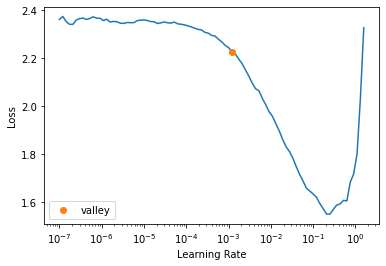

In [7]:
# Assess potential learning rates
lr = learn.lr_find()

In [8]:
# Fine tune the model
learn.fine_tune(1, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,1.594558,0.935256,0.724470,00:41


epoch,train_loss,valid_loss,accuracy,time
0,0.939089,0.683453,0.804432,01:23


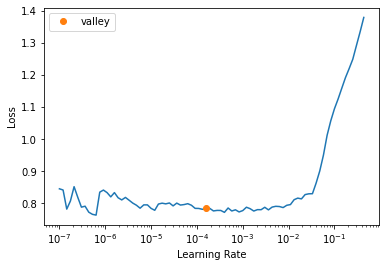

In [9]:
# Assess potential learning rates
lr = learn.lr_find()

In [10]:
# Fine tune the model
learn.fine_tune(1, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.806716,0.698267,0.805395,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.798089,0.660865,0.816956,01:22


In [11]:
# Display results
learn.show_results()

,text,category,category_
0,"xxbos xxmaj from : clinton-hq@campaign92.org ( clinton / xxmaj gore ' 92 ) \n xxmaj subject : xxup clinton : xxmaj background briefing in xxmaj vancouver xxunk \n xxmaj organization : xxmaj project xxup gnu , xxmaj free xxmaj software xxmaj foundation , \n▁ 675 xxmaj mass . xxmaj ave . , xxmaj cambridge , xxup ma 02139 , xxup usa +1 ( 617 ) 876 - 3296 \n xxmaj lines : xxunk \n nntp - posting - host : life.ai.mit.edu \n\n\n\n\n\n▁ xxup the xxup white xxup house \n\n▁ xxmaj office of the xxmaj press xxmaj secretary \n▁ ( vancouver , xxmaj british xxmaj columbia ) \n▁ xxrep 62 _ \n\n\n▁ xxup background xxup briefing \n▁ xxup by \n▁ xxup senior xxup administration xxup officials \n\n\n▁ xxmaj april 4 , 1993 \n\t▁\n▁ xxmaj canada xxmaj place \n▁ xxmaj vancouver , xxmaj british xxmaj columbia \n\n\n xxunk xxup a.m. xxup pst",8,8
1,"xxbos xxmaj from : blgardne@javelin.sim.es.com ( dances xxmaj with xxmaj bikers ) \n xxmaj subject : xxup faq - xxmaj what is the dod ? \n xxmaj summary : xxmaj everything you always wanted to know about dod , but were afraid to ask \n xxmaj keywords : dod xxup faq \n article - i.d . : xxunk \n xxmaj expires : xxmaj sun , 30 xxmaj may 1993 xxunk xxup gmt \n reply - to : blgardne@javelin.sim.es.com \n xxmaj organization : xxmaj evans & xxmaj sutherland xxmaj computer xxmaj corporation \n xxmaj lines : xxunk \n xxmaj supersedes : < xxunk > \n\n xxmaj this is a periodic posting intended to answer the xxmaj frequently xxmaj asked \n xxmaj question : xxmaj what is the dod ? xxmaj it is posted the first of each month , with \n an expiration time of over a month . xxmaj thus",3,3
2,"xxbos xxmaj from : leech@cs.unc.edu ( jon xxmaj leech ) \n xxmaj subject : xxmaj space xxup faq 10 / 15 - xxmaj planetary xxmaj probe xxmaj history \n xxmaj supersedes : < xxunk > \n xxmaj organization : xxmaj university of xxmaj north xxmaj carolina , xxmaj chapel xxmaj hill \n xxmaj lines : 527 \n xxmaj distribution : world \n xxmaj expires : 6 xxmaj may 1993 xxunk xxup gmt \n nntp - posting - host : mahler.cs.unc.edu \n xxmaj keywords : xxmaj frequently xxmaj asked xxmaj questions \n\n xxmaj archive - name : space / probe \n xxmaj last - modified : $ date : 93 / 04 / 01 xxunk $ \n\n xxup planetary xxup probes - xxup historical xxup missions \n\n▁ xxmaj this section was lightly adapted from an original posting by xxmaj larry xxmaj klaes \n▁ ( klaes@verga.enet.dec.com ) , mostly minor formatting changes",7,7
3,"xxbos xxmaj from : mcelwre@cnsvax.uwec.edu \n xxmaj subject : xxup larsonian xxmaj astronomy and xxmaj physics \n xxmaj organization : xxmaj university of xxmaj wisconsin xxmaj eau xxmaj claire \n xxmaj lines : xxunk \n\n\n\n▁ xxup larsonian xxmaj astronomy and xxmaj physics \n\n▁ xxmaj orthodox physicists , astronomers , and astrophysicists \n▁ xxup claim to be looking for a "" unified xxmaj field xxmaj theory "" in which all \n▁ of the forces of the universe can be explained with a single \n▁ set of laws or equations . xxmaj but they have been systematically \n▁ xxup ignoring or xxup xxunk an excellent one for 30 years ! \n\n▁ xxmaj the late xxmaj physicist xxmaj dewey xxup b. xxmaj larson 's comprehensive \n▁ xxup general xxup unified xxmaj theory of the physical universe , which he \n▁ calls the "" reciprocal xxmaj system "" , is built on two fundamental",7,7
4,"xxbos xxmaj from : david@stat.com ( david xxmaj dodell ) \n xxmaj subject : xxup hicn610 xxmaj medical xxmaj news xxmaj part 3 / 4 \n reply - to : david@stat.com ( david xxmaj dodell ) \n xxmaj distribution : world \n xxmaj organization : xxmaj stat xxmaj gateway xxmaj service , xxup wb7tpy \n xxmaj lines : 708 \n\n\n▁ xxrep 13 - cut here xxrep 17 - \n xxmaj university of xxmaj arizona \n xxmaj tucson , xxmaj arizona \n\n\n\n▁ xxmaj suggested xxmaj reading \n\n xxmaj tan xxup sl , xxmaj xxunk xxup p , xxmaj campbell xxup s , xxmaj jacobs xxup hs , xxmaj betts xxup j , xxmaj mason xxup b , xxmaj edwards xxup xxunk ( 1992 ) . \n xxmaj cum